--- Data Loaded Successfully ---

--- Data Cleaning and Merging Complete ---

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      866 non-null    object        
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    int64         
 7   reward                     907 non-null    int64         
 8   month_x                    907 non-null    int64         
 9   sunset_time                907 non-null    object        
 10  hours_after_sunset_x       907 no

/tmp/ipython-input-2516655920.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk', y='bat_landing_to_food', data=df_merged, palette='viridis')


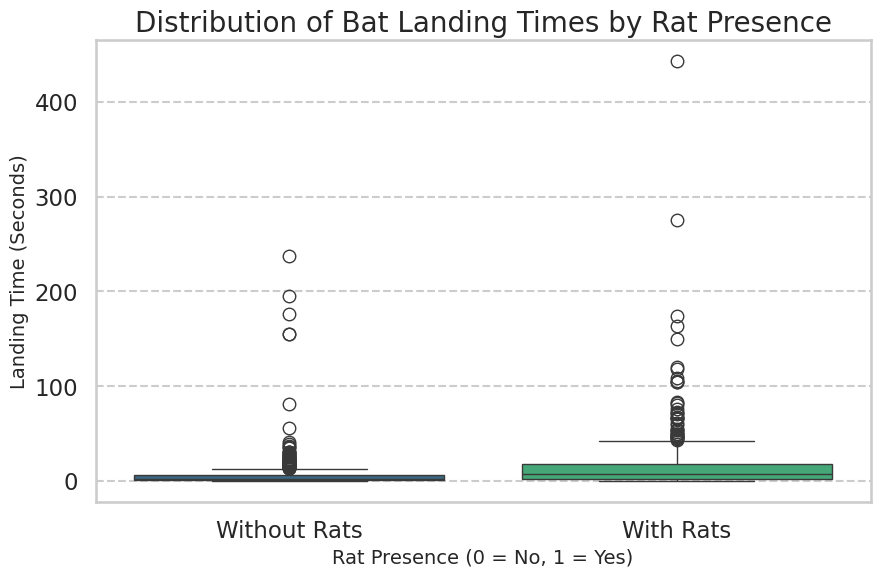

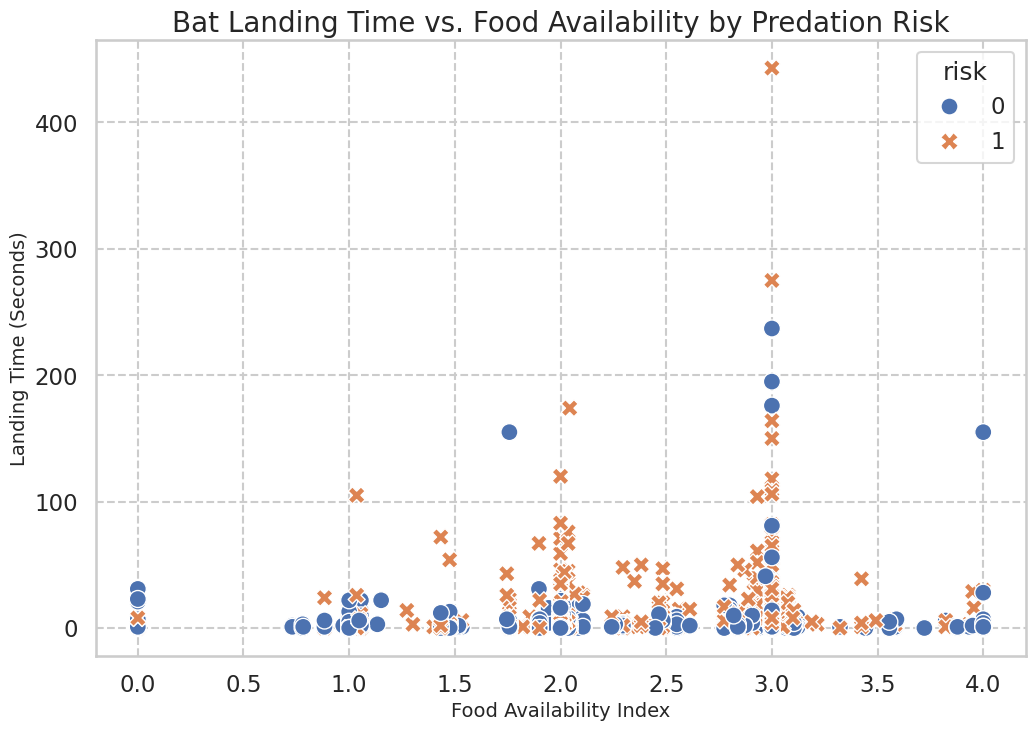

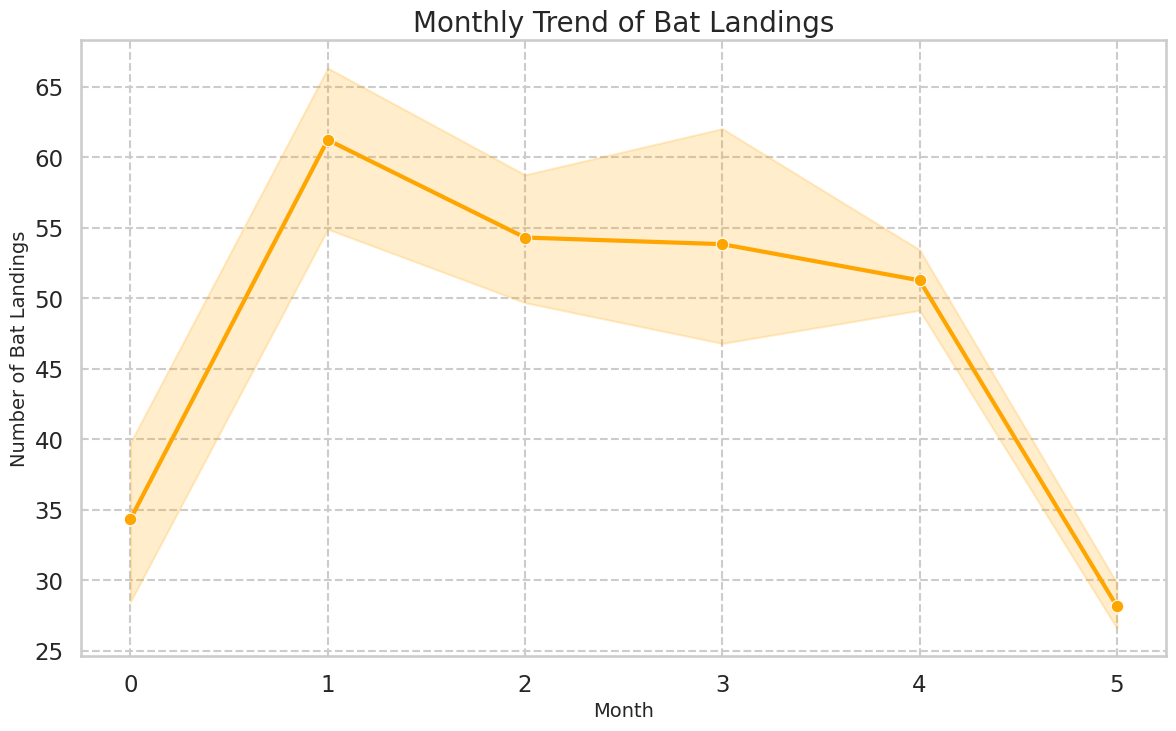

/tmp/ipython-input-2516655920.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='risk', y='bat_landing_to_food', col='season', data=df_merged,


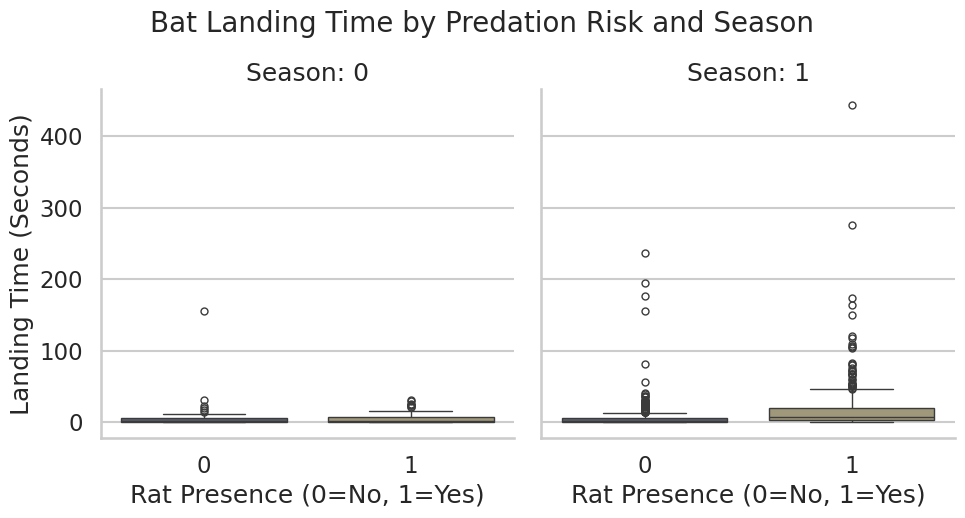

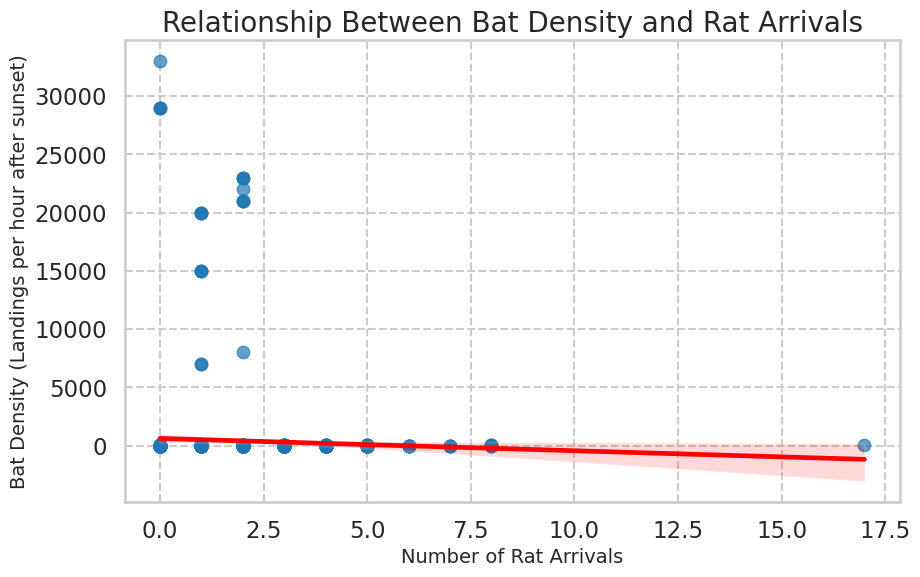


--- All Analyses and Visualizations Complete ---


In [22]:
# Part 1: Environment Setup and Data Loading

# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Loading  the datasets
df1 = pd.read_csv('dataset1 (1).csv')
df2 = pd.read_csv('dataset2.csv')

print("--- Data Loaded Successfully ---")

# Part 2: Data Cleaning and Exploration

df1['start_time'] = pd.to_datetime(df1['start_time'], dayfirst=True)
df1['rat_period_start'] = pd.to_datetime(df1['rat_period_start'], dayfirst=True)
df1['rat_period_end'] = pd.to_datetime(df1['rat_period_end'], dayfirst=True)
df2['time'] = pd.to_datetime(df2['time'], dayfirst=True)

# Merging two datasets
df_merged = pd.merge_asof(df1.sort_values('start_time'), df2.sort_values('time'),
                          left_on='start_time', right_on='time', direction='nearest')

print("\n--- Data Cleaning and Merging Complete ---")
print("\nMerged DataFrame Info:")
df_merged.info()
print("\nMerged DataFrame Head:")
print(df_merged.head())

# Part 3: Descriptive and Inferential Analysis
print("\n--- Descriptive Statistics for Bat Landing Time ---")
print(df_merged['bat_landing_to_food'].describe())

print("\n--- Mean Landing Time by Rat Presence ---")
print(df_merged.groupby('risk')['bat_landing_to_food'].mean())

# Perform a t-test to check for a significant difference
print("\n--- Performing Inferential T-test ---")
with_rats = df_merged[df_merged['risk'] == 1]['bat_landing_to_food'].dropna()
without_rats = df_merged[df_merged['risk'] == 0]['bat_landing_to_food'].dropna()
t_stat, p_value = ttest_ind(with_rats, without_rats, equal_var=False)

print(f"T-statistic: {t_stat: .4f}")
print(f"p-Value: {p_value: .4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in bat behavior.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in bat behavior.")

# Correlation analysis
print("\n--- Correlation Analysis: Food Availability and Bat Landings ---")
correlation = df_merged['food_availability'].corr(df_merged['bat_landing_number'])
print(f"Correlation coefficient between Food Availability and Bat Landings: {correlation: .4f}")

if correlation > 0.5:
    print("Conclusion: There is a strong positive correlation. As food availability increases, the number of bat landings tends to increase.")
elif correlation < -0.5:
    print("Conclusion: There is a strong negative correlation. As food availability decreases, the number of bat landings tends to decrease.")
else:
    print("Conclusion: There is no strong correlation.")

# Mean landing time by season
print("\n--- Mean Landing Time by Season ---")
print(df_merged.groupby('season')['bat_landing_to_food'].mean())

# Feature Engineering
print("\n--- Feature Engineering ---")
df_merged['hours_after_sunset_y'] = df_merged['hours_after_sunset_y'].replace(0, 0.001)
df_merged['bat_density'] = df_merged['bat_landing_number'] / df_merged['hours_after_sunset_y']
print(df_merged['bat_density'].describe())

# Part 4: Visualizations for our analysis
sns.set_style("whitegrid")
sns.set_context("talk")

print("\n--- Generating  Visualizations ---")

# Visualization 1: Boxplot comparing landing times with the availability of rats
plt.figure(figsize=(10, 6))
sns.boxplot(x='risk', y='bat_landing_to_food', data=df_merged, palette='viridis')
plt.title('Distribution of Bat Landing Times by Rat Presence', fontsize=20)
plt.xlabel('Rat Presence (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Landing Time (Seconds)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Without Rats', 'With Rats'])
plt.grid(axis='y', linestyle='--')
plt.show()

# Visualization 2: Relationship between bat landings and food availability
plt.figure(figsize=(12, 8))
sns.scatterplot(x='food_availability', y='bat_landing_to_food', data=df_merged,
                hue='risk', style='risk', s=150, palette='deep')
plt.title('Bat Landing Time vs. Food Availability by Predation Risk', fontsize=20)
plt.xlabel('Food Availability Index', fontsize=14)
plt.ylabel('Landing Time (Seconds)', fontsize=14)
plt.grid(axis='both', linestyle='--')
plt.show()

# Visualization 3: Bat landings over the months with a clear line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='month_y', y='bat_landing_number', data=df_merged, marker='o',
             color='orange', linewidth=3)
plt.title('Monthly Trend of Bat Landings', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bat Landings', fontsize=14)
plt.grid(axis='both', linestyle='--')
plt.show()

# Visualization 4: Comparison of landing times by season and risk using `catplot`
g = sns.catplot(x='risk', y='bat_landing_to_food', col='season', data=df_merged,
                kind='box', palette='cividis')
g.set_titles("Season: {col_name}")
g.set_axis_labels('Rat Presence (0=No, 1=Yes)', 'Landing Time (Seconds)')
plt.suptitle('Bat Landing Time by Predation Risk and Season', y=1.05, fontsize=20)
plt.show()

# Visualization 5: Bat density vs rat arrivals with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='rat_arrival_number', y='bat_density', data=df_merged,
            scatter_kws={'s': 80, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Relationship Between Bat Density and Rat Arrivals', fontsize=20)
plt.xlabel('Number of Rat Arrivals', fontsize=14)
plt.ylabel('Bat Density (Landings per hour after sunset)', fontsize=14)
plt.grid(axis='both', linestyle='--')
plt.show()

print("\n--- All Analyses and Visualizations Complete ---")